# Show when the input to the network is a normal image

In [1]:
%cd ..

/workspaces/birdClassification


In [4]:
from classifier.loader import loader

classifier_4D = False
num_images_to_show = 5
input_size = 224
data_loader = loader("bird_dataset/crop_from_network", input_size, "train", 1, shuffle=False, data_augmentation=False, classifier_4D=classifier_4D)
data_loader_augment = loader("bird_dataset/crop_from_network", input_size, "train", 1, shuffle=False, data_augmentation=True, classifier_4D=classifier_4D)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


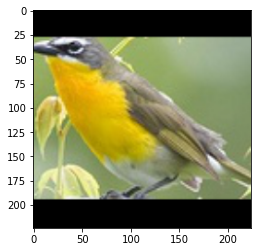

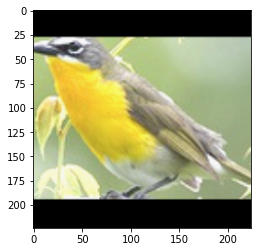

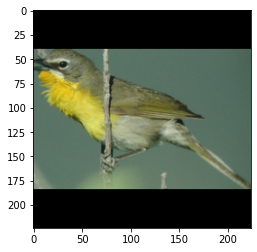

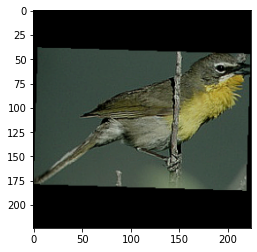

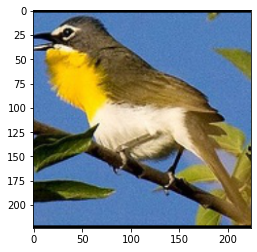

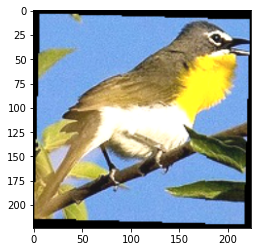

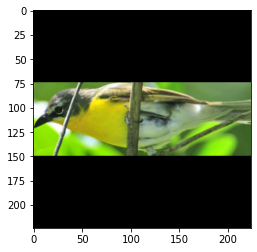

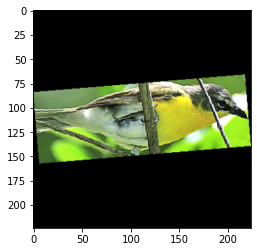

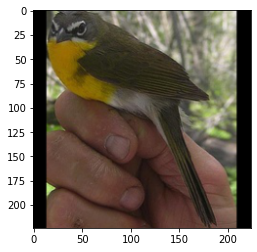

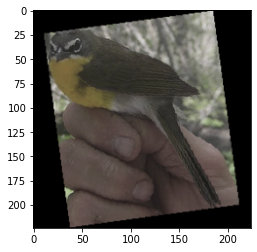

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from classifier.loader import unnormalizer

num_images_shown = 0

data_loader_augment_iter = data_loader_augment.__iter__()

for idx, (image_batch, target) in enumerate(data_loader):
    (image_batch_augment, target_augment) = data_loader_augment_iter.__next__()
    
    image = np.array(unnormalizer(image_batch).permute(0, 2, 3, 1))[0]
    plt.imshow(image)

    plt.figure()
    image_augment = np.array(unnormalizer(image_batch_augment).permute(0, 2, 3, 1))[0]
    plt.imshow(image_augment)

    num_images_shown += 1
    if num_images_shown >= num_images_to_show:
        break
    plt.figure()

# Show when the input to the network is an image and its segmentation map

In [1]:
%cd ..

/workspaces/birdClassification


In [2]:
from classifier.loader import loader

classifier_4D = True
num_images_to_show = 5
input_size = 224
data_loader = loader("bird_dataset/segmentation_from_network", input_size, "train", 1, shuffle=False, data_augmentation=False, classifier_4D=classifier_4D)
data_loader_augment = loader("bird_dataset/segmentation_from_network", input_size, "train", 1, shuffle=False, data_augmentation=True, classifier_4D=classifier_4D)

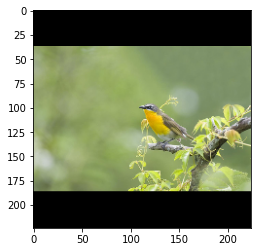

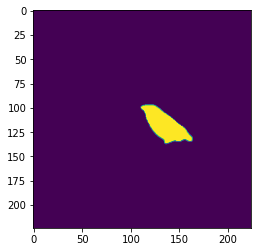

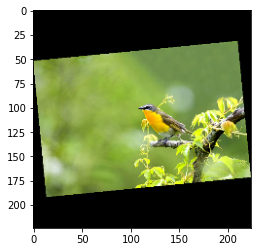

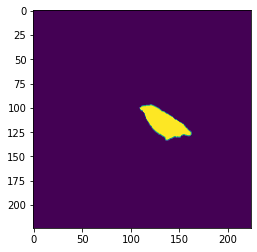

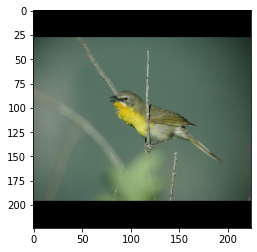

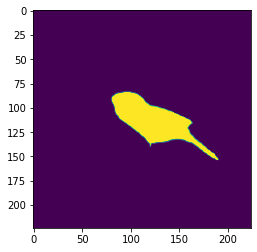

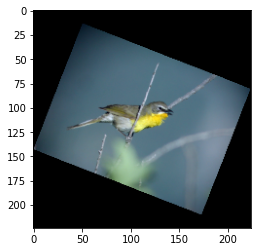

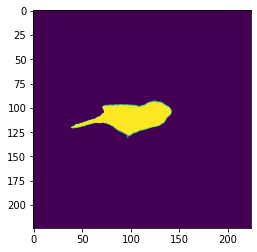

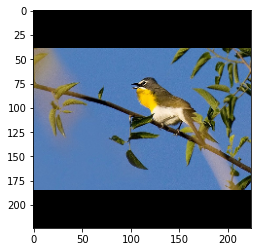

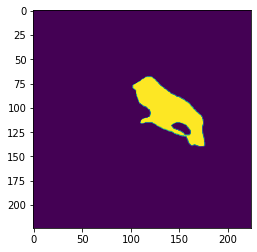

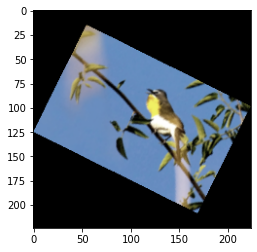

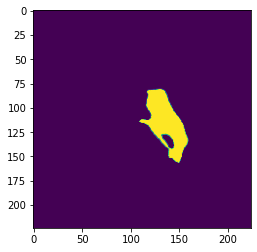

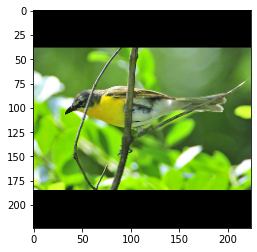

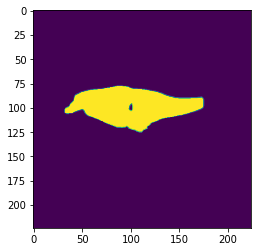

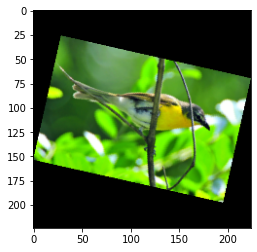

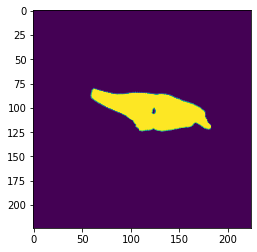

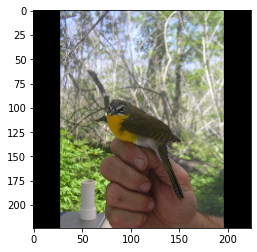

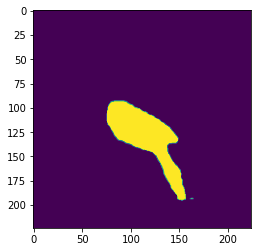

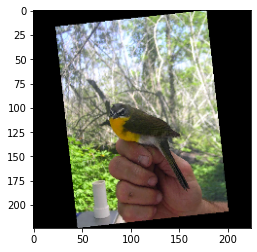

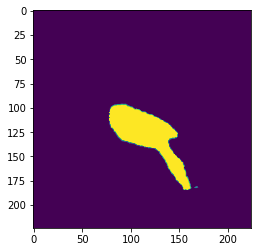

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from classifier.loader import unnormalizer

num_images_shown = 0

data_loader_augment_iter = data_loader_augment.__iter__()

for idx, (image_batch, target) in enumerate(data_loader):
    (image_batch_augment, target_augment) = data_loader_augment_iter.__next__()

    image = np.array(unnormalizer(image_batch[:, :3]).permute(0, 2, 3, 1))[0].astype(np.uint8)
    plt.imshow(image)
    plt.figure()
    image_map = np.array(image_batch[:, 3].permute(0, 1, 2))[0].astype(np.uint8)
    plt.imshow(image_map)

    plt.figure()
    image_augment = np.array(unnormalizer(image_batch_augment[:, :3]).permute(0, 2, 3, 1))[0].astype(np.uint8)
    plt.imshow(image_augment)
    plt.figure()
    image_map_augment = np.array(image_batch_augment[:, 3].permute(0, 1, 2))[0].astype(np.uint8)
    plt.imshow(image_map_augment)


    num_images_shown += 1
    if num_images_shown >= num_images_to_show:
        break
    plt.figure()